In [ ]:
# Install the openCV code:

# pip install opencv-python
# pip install opencv-contrib-python

# Each of these cells should be able to run independently

# Use https://play.google.com/store/apps/details?id=com.pas.webcam&hl=en_GB
# and then set as server and video capture from the ip, like http://192.168.1.243:8080/video
# ip-webcam

In [162]:
# Prove we can video capture and show BW images
# Pops up in new wondow.  Hit 'q' to quit

# attempts at using threading to defeat the bad buffering when using the IP camera 
# mode from the phone.  But still has too much lag and issues in comparison to 
# the serial webcam
import numpy as np
import threading, time
import cv2

cap = cv2.VideoCapture(1)  # works on webcam plugged in
#cap = cv2.VideoCapture("http://10.0.38.88:8080/video")
print("fps", cap.get(cv2.CAP_PROP_FPS))
cap.set(cv2.CAP_PROP_BUFFERSIZE, 2)
print(cap.get(cv2.CAP_PROP_BUFFERSIZE))

cframe = { }
def capread():
    while cframe.get("stop") is None:
        ret, frame = cap.read()
        if ret:
            cframe["frame"] = frame
        else:
            break

imageSize = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
x = threading.Thread(target=capread, daemon=True)
x.start()

while True:
    frame = cframe.pop("frame", None)
    if frame is not None:
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame', frame)
    else:
        time.sleep(0.01)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cframe["stop"] = 1
cap.release()
cv2.destroyAllWindows()
print(imageSize)


fps 0.0
0.0


KeyboardInterrupt: 

0.0


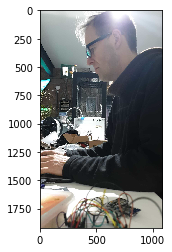

In [8]:
# Prove we can video capture code and detect aruco tags
# Hit 'q' to quit, and it shows last frame output
import numpy as np
import cv2
aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_50)
parameters =  cv2.aruco.DetectorParameters_create()

# See https://docs.opencv.org/master/d5/dae/tutorial_aruco_detection.html
parameters.cornerRefinementMethod = cv2.aruco.CORNER_REFINE_CONTOUR

winSize, zeroZone, criteria = (5, 5), (-1, -1), (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 30, 0.1)

device = "S9"
if device == "S9":
    cap = cv2.VideoCapture("http://10.0.38.88:8080/video")
    cap.set(cv2.CAP_PROP_BUFFERSIZE, 1)
    print(cap.get(cv2.CAP_PROP_BUFFERSIZE))
else:
    cap = cv2.VideoCapture(1)  # works on webcam plugged in
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)

while(True):
    ret, frame = cap.retrieve()
    corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(frame, aruco_dict, parameters=parameters)
    if False:
        frameg = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        for corner in corners:  # optional loop
            cv2.cornerSubPix(frameg, corner, winSize, zeroZone, criteria)
    bframe = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cv2.aruco.drawDetectedMarkers(bframe, corners, ids)
    cv2.imshow('frame', bframe)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(bframe)

In [22]:
print(dir(parameters))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'adaptiveThreshConstant', 'adaptiveThreshWinSizeMax', 'adaptiveThreshWinSizeMin', 'adaptiveThreshWinSizeStep', 'aprilTagCriticalRad', 'aprilTagDeglitch', 'aprilTagMaxLineFitMse', 'aprilTagMaxNmaxima', 'aprilTagMinClusterPixels', 'aprilTagMinWhiteBlackDiff', 'aprilTagQuadDecimate', 'aprilTagQuadSigma', 'cornerRefinementMaxIterations', 'cornerRefinementMethod', 'cornerRefinementMinAccuracy', 'cornerRefinementWinSize', 'create', 'detectInvertedMarker', 'errorCorrectionRate', 'markerBorderBits', 'maxErroneousBitsInBorderRate', 'maxMarkerPerimeterRate', 'minCornerDistanceRate', 'minDistanceToBorder', 'minMarkerDistanceRate', 'minMarkerPerimeterRate', 'minOtsuStdDev', 'perspectiveRemoveIgnored

In [33]:
parameters.adaptiveThreshWinSizeMax


In [42]:
parameters =  cv2.aruco.DetectorParameters_create()
#parameters.cornerRefinementMethod = cv2.aruco.CORNER_REFINE_CONTOUR
parameters.adaptiveThreshWinSizeMax = 53
frameg = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(frameg, aruco_dict, parameters=parameters)
ids


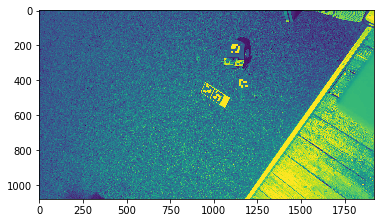

In [45]:
plt.imshow(frameg)

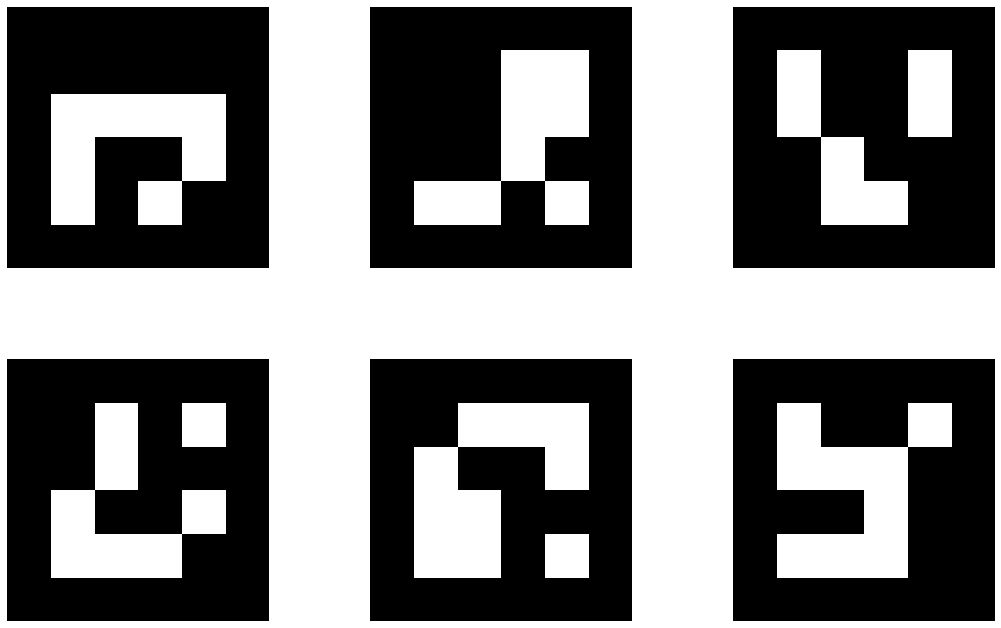

In [60]:
# Plot the charuco board and charuco tags in this cell please
import numpy as np
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline

aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_50)
fig = plt.figure(figsize=(18,11.3))
nx = 3
ny = 2
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny, nx, i)
    img = aruco.drawMarker(aruco_dict, i, 700)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")
#plt.subplots_adjust(0,0,1,1,0.05,0.05)
plt.subplots_adjust(wspace=0.3, hspace=0.35)
#plt.savefig("arucomarkers.png")
plt.show()


charucoCornersIds recorded 0


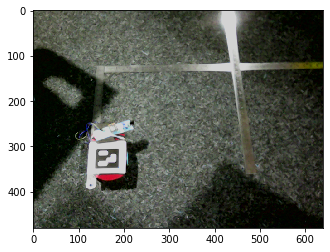

In [167]:
# Do the camera calibration process from the charuco chessboards
# This bit for CHESSBOARDS with ARUCO Tags

import numpy as np
import cv2

aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_50)
parameters =  cv2.aruco.DetectorParameters_create()
squaresX, squaresY, markersquareratio = 5, 7, 0.5
chesssquareLength = 276.0/7
charboard = cv2.aruco.CharucoBoard_create(squaresX, squaresY, chesssquareLength, chesssquareLength*markersquareratio, aruco_dict)
winSize, zeroZone, criteria = (5, 5), (-1, -1), (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 30, 0.1)

charucoCornersIds = [ ]
device = "alexwebcam"
if device == "S9":
    cap = cv2.VideoCapture("http://10.0.38.88:8080/video")
else:
    cap = cv2.VideoCapture(2)  # works on webcam plugged in
    
imageSize = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
while(True):
    ret, frame = cap.read()
    markerCorners, markerIds, rejectedMarkers = cv2.aruco.detectMarkers(frame, aruco_dict)
    bframe = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    if markerCorners:
        frameg = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #for corner in markerCorners:  # optional loop
        #    cv2.cornerSubPix(frameg, corner, winSize, zeroZone, criteria)
        retval, charucoCorners, charucoIds = cv2.aruco.interpolateCornersCharuco(markerCorners, markerIds, frameg, charboard)
        cv2.aruco.drawDetectedCornersCharuco(bframe, charucoCorners, charucoIds)
        if retval >= 10:
            charucoCornersIds.append((charucoCorners, charucoIds))
    cv2.imshow('frame', bframe)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(frame)
print("charucoCornersIds recorded", len(charucoCornersIds))

In [6]:
print("charucoCornersIds recorded", len(charucoCornersIds))

charucoCornersIds recorded 144


In [49]:
# This one is a continuation of the one above using charucoCornersIds
import time

subcharucoCornersIds = charucoCornersIds[::10]
assert len(subcharucoCornersIds) < 50, "Warning too slow %d"%len(subcharucoCornersIds)
allCorners = [ charucoCorners  for (charucoCorners, charucoIds) in subcharucoCornersIds ]
allIds = [ charucoIds  for (charucoCorners, charucoIds) in subcharucoCornersIds ]

t0 = time.time()
cameraMatrixInit = np.array([[ 1000.,    0., imageSize[0]/2.],
                             [    0., 1000., imageSize[1]/2.],
                             [    0.,    0.,           1.]])

distCoeffsInit = np.zeros((5,1))
flags = (cv2.CALIB_USE_INTRINSIC_GUESS + cv2.CALIB_RATIONAL_MODEL + cv2.CALIB_FIX_ASPECT_RATIO)
#flags = (cv2.CALIB_RATIONAL_MODEL)
(ret, cameraMatrix, distCoeffs,
    rotation_vectors, translation_vectors,
    stdDeviationsIntrinsics, stdDeviationsExtrinsics,
    perViewErrors) = cv2.aruco.calibrateCameraCharucoExtended(
                      charucoCorners=allCorners,
                      charucoIds=allIds,
                      board=charboard,
                      imageSize=imageSize,
                      cameraMatrix=cameraMatrixInit,
                      distCoeffs=distCoeffsInit,
                      flags=flags,
                      criteria=(cv2.TERM_CRITERIA_EPS & cv2.TERM_CRITERIA_COUNT, 10000, 1e-9))

t1 = time.time()
print("Time taken to calculate", int(t1-t0), "seconds\n")
print("imageSize = %s" % repr(imageSize))
print("cameraMatrix = np.\\\n%s" % repr(cameraMatrix))
print("distCoeffs = np.%s" % repr(distCoeffs.T[:,:5]))


Time taken to calculate 18 seconds

imageSize = (640, 480)
cameraMatrix = np.\
array([[978.05105325,   0.        , 256.92932715],
       [  0.        , 978.05105325, 275.31236529],
       [  0.        ,   0.        ,   1.        ]])
distCoeffs = np.array([[-5.94459890e+00,  8.09059356e+01,  8.26388143e-03,
        -7.75808134e-03,  4.71557836e+01]])


In [ ]:
# Now we have the camera calibration, we can use it to plot the orientation
# of each Aruco tag

[('aruco3', 465)]

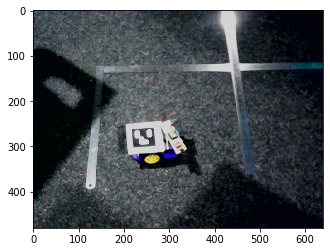

In [168]:
import numpy as np
import cv2, time

device = "alexwebcam"
if device == "alexwebcam":
    imageSize = (640, 480)
    cameraMatrix = np.\
    array([[978.05105325,   0.        , 256.92932715],
           [  0.        , 978.05105325, 275.31236529],
           [  0.        ,   0.        ,   1.        ]])
    distCoeffs = np.array([[-5.94459890e+00,  8.09059356e+01,  8.26388143e-03,
            -7.75808134e-03,  4.71557836e+01]])
elif device == "S9": 
    imageSize = (1920, 1080)
    cameraMatrix = np.\
    array([[885.79391355,   0.        , 924.63212411],
           [  0.        , 885.79391355, 571.75973105],
           [  0.        ,   0.        ,   1.        ]])
    distCoeffs = np.array([[-5.60709221e+00,  1.43163373e+01, -1.03639088e-02,
             1.66347845e-02, -5.29381492e+00]])

markerLength = 0.080  # dimension in metres
winSize, zeroZone, criteria = (5, 5), (-1, -1), (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 30, 0.1)

aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_50)
parameters =  cv2.aruco.DetectorParameters_create()

# See https://docs.opencv.org/master/d5/dae/tutorial_aruco_detection.html
parameters.cornerRefinementMethod = cv2.aruco.CORNER_REFINE_CONTOUR

if device == "S9": 
    cap = cv2.VideoCapture("http://10.0.38.88:8080/video")
    cap.set(cv2.CAP_PROP_BUFFERSIZE, 1)
else:
    cap = cv2.VideoCapture(2)  # works on webcam plugged in
    cap.set(cv2.CAP_PROP_SHARPNESS, 1)
    cap.set(cv2.CAP_PROP_BRIGHTNESS, 80)

trvecs = {}

while True:
    if not cap.grab():
        time.sleep(0.01)
        continue
    ret, frame = cap.retrieve()
    
    corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(frame, aruco_dict, parameters=parameters)
    gframe = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    for corner in corners:
        cv2.cornerSubPix(gframe, corner, winSize, zeroZone, criteria)
    crvecs, ctvecs, _objPoints = cv2.aruco.estimatePoseSingleMarkers(corners, markerLength, cameraMatrix, distCoeffs)
    bframe = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    if ids is not None:
        for i in range(len(ids)):
            cv2.aruco.drawAxis(bframe, cameraMatrix, distCoeffs, crvecs[i], ctvecs[i], 0.1)
            key = "aruco%d"%ids[i][0]
            if key not in trvecs:
                trvecs[key] = ([], [])
            trvecs[key][0].append(ctvecs[i][0])
            trvecs[key][1].append(crvecs[i][0])

    cv2.aruco.drawDetectedMarkers(bframe, corners, ids)
    cv2.imshow('frame', bframe)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
        
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(bframe)
[(k,len(v[0]))  for k, v in trvecs.items()]        

In [102]:
[(k,len(v[0]))  for k, v in trvecs.items()]

[('aruco3', 450)]

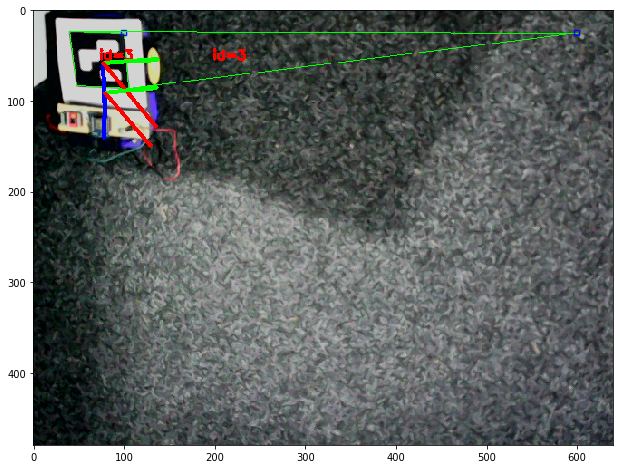

In [161]:
from matplotlib import pyplot as plt
%matplotlib inline
corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(frame, aruco_dict, parameters=parameters)
gframe = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
for corner in corners:
    cv2.cornerSubPix(gframe, corner, winSize, zeroZone, criteria)
crvecs, ctvecs, _objPoints = cv2.aruco.estimatePoseSingleMarkers(corners, markerLength, cameraMatrix, distCoeffs)

bframe = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

rvec = crvecs[0][0]
tvec = ctvecs[0][0]
m = cv2.Rodrigues(rvec)[0]
ltvec = tvec + m.T[0]*0.05  # 5cm in X

cv2.aruco.drawDetectedMarkers(bframe, corners, ids)
corners = [np.array([[[ 600 ,  24.988945],
         [105.48641 ,  85.69822 ],
         [ 48.027393,  83.387024],
         [ 39.848392,  23.43558 ]]], dtype=np.float32)]
cv2.aruco.drawDetectedMarkers(bframe, corners, ids)


cv2.aruco.drawAxis(bframe, cameraMatrix, distCoeffs, rvec, tvec, 0.1)
cv2.aruco.drawAxis(bframe, cameraMatrix, distCoeffs, rvec, ltvec, 0.1)

plt.figure(figsize=(11,8))
plt.imshow(bframe)


In [156]:
corners

[array([[[ 99.53873 ,  24.988945],
         [105.48641 ,  85.69822 ],
         [ 48.027393,  83.387024],
         [ 39.848392,  23.43558 ]]], dtype=float32)]

In [146]:

import ipyvolume as ipv
import numpy as np
#x, y, z, u, v, w = np.random.random((6, 1000))*2-1
#quiver = ipv.quickquiver(x, y, z, u, v, w, size=5)

atvecs = np.array(trvecs["aruco3"][0])
arvecs = np.array(trvecs["aruco3"][1])
#for tvec in atvecs:
#    print(tvec)
#quiver
#x, y, z = np.array(atvecs)[:,0], np.array(atvecs)[:,1], np.array(atvecs)[:,2]

#nvecs = np.array([cv2.Rodrigues(rvec)[0].T[0]  for rvec in arvecs])*0.05  # Xdir
nvecs = np.array([cv2.Rodrigues(rvec)[0].T[2]  for rvec in arvecs])*0.05  # Zdir

x, y, z = atvecs[:,0], atvecs[:,1], atvecs[:,2]
u, v, w = nvecs[:,0], nvecs[:,1], nvecs[:,2]
ipv.clear()
quiver = ipv.quiver(x, y, z, u, v, w, size=1)
ipv.scatter(np.array([0.0]), np.array([0.0]), np.array([0.0]), size=1, color="green")

#ipv.scatter(x, y, z, size=5)
ipv.xlim(-1,1)
ipv.ylim(-1,1)
ipv.zlim(-2,2)

ipv.show()

In [143]:
ipv.clear()
ipv.scatter(np.array([0]), np.array([0]), np.array([0]), size=10, color="green")
ipv.scatter(np.array([0.0]), np.array([0.0]), np.array([1.0]), size=10, color="blue")

ipv.show()


In [150]:
help(cv2.solvePnP)

Help on built-in function solvePnP:

solvePnP(...)
    solvePnP(objectPoints, imagePoints, cameraMatrix, distCoeffs[, rvec[, tvec[, useExtrinsicGuess[, flags]]]]) -> retval, rvec, tvec
    .   @brief Finds an object pose from 3D-2D point correspondences.
    .   This function returns the rotation and the translation vectors that transform a 3D point expressed in the object
    .   coordinate frame to the camera coordinate frame, using different methods:
    .   - P3P methods (@ref SOLVEPNP_P3P, @ref SOLVEPNP_AP3P): need 4 input points to return a unique solution.
    .   - @ref SOLVEPNP_IPPE Input points must be >= 4 and object points must be coplanar.
    .   - @ref SOLVEPNP_IPPE_SQUARE Special case suitable for marker pose estimation.
    .   Number of input points must be 4. Object points must be defined in the following order:
    .     - point 0: [-squareLength / 2,  squareLength / 2, 0]
    .     - point 1: [ squareLength / 2,  squareLength / 2, 0]
    .     - point 2: [ squareLe

In [26]:
import math
m = cv2.Rodrigues(numpy.array([rvec0, rvec1, rvec2]))[0]
mz = m[2]
pitchC = math.degrees(-math.asin(m[0][2]))
rollC = math.degrees(-math.asin(m[1][2]))
northorientC = 180+math.degrees(math.atan2(m[1][0], m[1][1]))
#    return t*0.001, pitchC, rollC, northorientC

res = {}
for i in range(len(ids)):
    res["aruco%d"%ids[i][0]] = {"rvec":list(crvecs[i][0]), "tvec":list(ctvecs[i][0]) }
import json
json.dumps(res)


'{"aruco4": {"rvec": [0.004458459150734159, -2.9105444648606276, 0.6587027493107765], "tvec": [0.02045751040345107, 0.03558593631209625, 2.1195081120648864]}, "aruco5": {"rvec": [1.8555681853690789, -2.7224717535749896, -0.9647945770392414], "tvec": [0.008662426154928932, -0.12011606169875394, 2.095717275304062]}}'

In [27]:
import math
m = cv2.Rodrigues(crvecs[0])[0]
mz = m[2]
pitchC = math.degrees(-math.asin(m[0][2]))
rollC = math.degrees(-math.asin(m[1][2]))
northorientC = 180+math.degrees(math.atan2(m[1][0], m[1][1]))
#    return t*0.001, pitchC, rollC, northorientC


In [28]:
northorientC

182.01098476136823

In [29]:
m

array([[-0.98762776, -0.03750483, -0.15226554],
       [ 0.03171212,  0.90315164, -0.42814886],
       [ 0.15357652, -0.42768037, -0.89078828]])